# HOUSE PRICE PREDICTION USING LINEAR REGRESSION

1.   List item
2.   List item



In [3]:
import pandas as pd
import numpy as np

In [18]:
data=pd.read_excel('/content/drive/My Drive/data/Copy of Linear Regression.xlsx')


In [19]:
data.corr()

,price,sqft_living,bedrooms,bathrooms,floors
price,1.000000,0.702035,0.308350,0.525138,0.256794
sqft_living,0.702035,1.000000,0.576671,0.754665,0.353949
bedrooms,0.308350,0.576671,1.000000,0.515884,0.175429
bathrooms,0.525138,0.754665,0.515884,1.000000,0.500653
floors,0.256794,0.353949,0.175429,0.500653,1.000000


In [20]:
data.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [21]:
columns=data.columns
columns

Index(['price', 'sqft_living', 'bedrooms', 'bathrooms', 'floors'], dtype='object')

# checking NULL values

In [22]:
data.isnull().sum()

price          0
sqft_living    0
bedrooms       0
bathrooms      0
floors         0
dtype: int64

# There are no null values in dataset

In [23]:
data.dtypes

price            int64
sqft_living      int64
bedrooms         int64
bathrooms      float64
floors         float64
dtype: object

# UNIVARIATE ANALYSIS

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

#understand the distribution of data

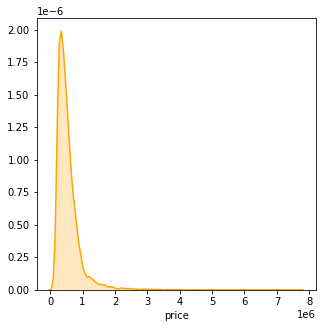

In [25]:
plt.figure(figsize=(5,5))
sns.distplot(data['price'],hist=False,color='orange',kde_kws = {"shade":True})

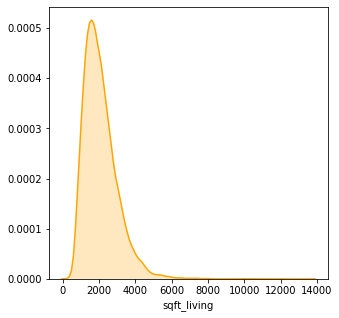

In [ ]:
plt.figure(figsize=(5,5))
sns.distplot(data['sqft_living'],hist=False,color='orange',kde_kws = {"shade":True})

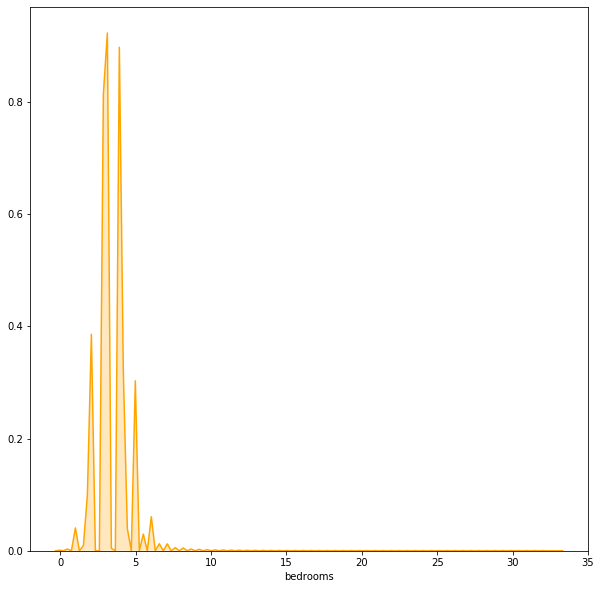

In [ ]:
plt.figure(figsize=(10,10))
sns.distplot(data['bedrooms'],hist=False,color='orange',kde_kws = {"shade":True})

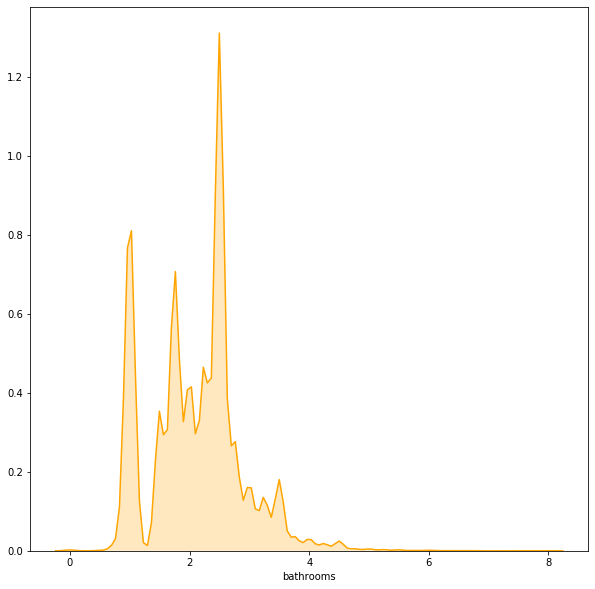

In [ ]:
plt.figure(figsize=(10,10))
sns.distplot(data['bathrooms'],hist=False,color='orange',kde_kws = {"shade":True})

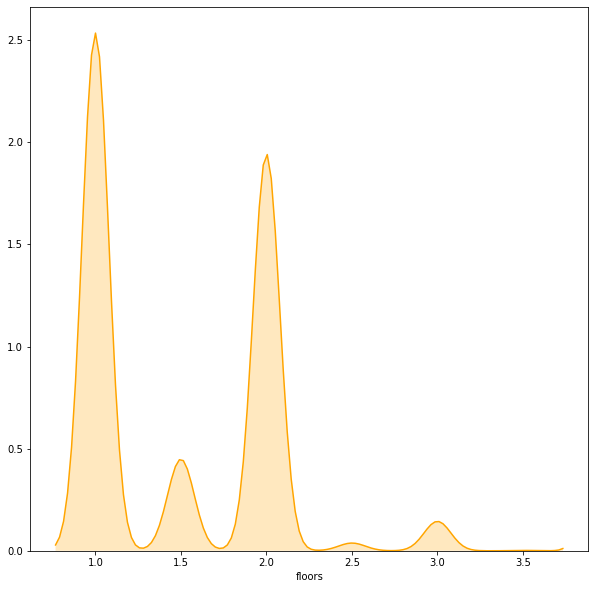

In [ ]:
plt.figure(figsize=(10,10))
sns.distplot(data['floors'],hist=False,color='orange',kde_kws = {"shade":True})

# we will see that the price and sqft_living are left skewed
# since remaining columns having discrete values we cant find the distribution

# lets find the outliers

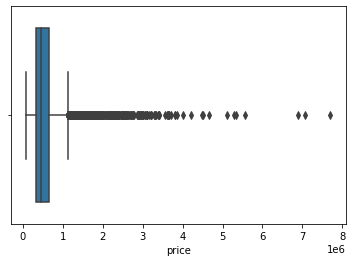

In [26]:
sns.boxplot(data['price'])

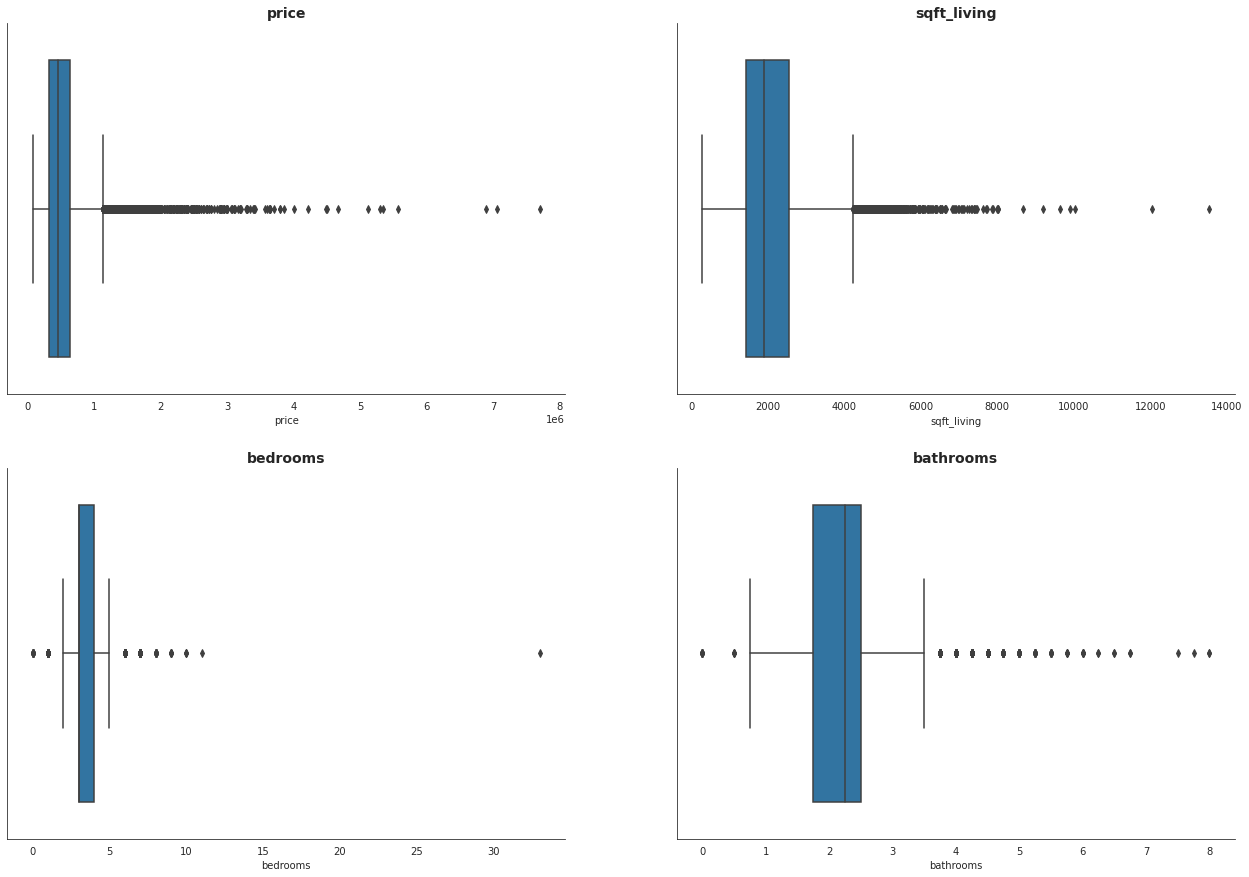

In [27]:
# Set initial plot options
sns.set_style('white')

# Create helper lists
columns_to_plot = data.columns.tolist()
titles_to_plot = data.columns.tolist()

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(22, 15))

# Iterate over each axes, and plot a boxplot with relevant columns/titles
for ax, column, title in zip(axes.flatten(), columns_to_plot, titles_to_plot):
  
  # Create a boxplot
  sns.boxplot(data[column] ,
              # Assign boxplot to an axes
              ax =ax)
  
  # Despine plot
  sns.despine()
  # Fix final styling for each axes
 
  ax.set_title(title, fontweight = "semibold", fontsize = 14)


plt.show()

# there are outliers in all the columns except the floors

In [ ]:
#since the data is not normaly distributed outliers are removed for calculating IQR,75% quartile and 25% quartile and  consider based on empirical formula

In [28]:
IQR=data.price.quantile(0.75)-data.price.quantile(0.25)
lower_bridge=data['price'].quantile(0.25)-(IQR*1.5)
higher_bridge=data['price'].quantile(0.75)+(IQR*1.5)
print(IQR,lower_bridge,higher_bridge)

323050.0 -162625.0 1129575.0


In [29]:
data=data[(data['price']<1080250)]
data['price'].max()

1080000

In [30]:
IQR=data.sqft_living.quantile(0.75)-data.sqft_living.quantile(0.25)
lower_bridge=data['sqft_living'].quantile(0.25)-(IQR*1.5)
higher_bridge=data['sqft_living'].quantile(0.75)+(IQR*1.5)
print(IQR,lower_bridge,higher_bridge)

1030.0 -145.0 3975.0


In [ ]:
data=data[(data['sqft_living']<4234)]
data['sqft_living'].max()

4230

In [31]:
IQR=data.bedrooms.quantile(0.75)-data.bedrooms.quantile(0.25)
lower_bridge=data['bedrooms'].quantile(0.25)-(IQR*1.5)
higher_bridge=data['bedrooms'].quantile(0.75)+(IQR*1.5)
print(IQR,lower_bridge,higher_bridge)


1.0 1.5 5.5


In [32]:
data=data[data['bedrooms']<6]

data['bedrooms'].max()

5

In [ ]:
data=data[data['bedrooms']>1.5]

data['bedrooms'].min()

2

In [33]:
IQR=data.bathrooms.quantile(0.75)-data.bathrooms.quantile(0.25)
lower_bridge=data['bathrooms'].quantile(0.25)-(IQR*1.5)
higher_bridge=data['bathrooms'].quantile(0.75)+(IQR*1.5)
print(IQR,lower_bridge,higher_bridge)

1.0 0.0 4.0


In [34]:
data=data[data['bathrooms']<3.6]

data['bathrooms'].max()

3.5

In [35]:
data=data[data['bathrooms']>0.6]

data['bathrooms'].min()

0.75

In [36]:
IQR=data.floors.quantile(0.75)-data.floors.quantile(0.25)
lower_bridge=data['floors'].quantile(0.25)-(IQR*1.5)
higher_bridge=data['floors'].quantile(0.75)+(IQR*1.5)
print(IQR,lower_bridge,higher_bridge)

1.0 -0.5 3.5


In [37]:
data=data[data['floors']<3.5]

data['floors'].max()

3.0

In [38]:
data.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [39]:
data.describe().T
data['sqft/floors']=data['sqft_living']/data['floors']
data['bedtobat']=abs(data['bedrooms']-data['bathrooms'])

data['all']=(data['sqft_living']+data['bathrooms']+data['floors'])//3
data['all1']=(data['sqft_living']*data['bedrooms']*data['bathrooms']*data['floors'])//4
data['bedtofloor']=data['bedrooms']*data['floors']
data.head()
#data.drop('bathrooms',axis=1)

,price,sqft_living,bedrooms,bathrooms,floors,sqft/floors,bedtobat,all,all1,bedtofloor
0,221900,1180,3,1.00,1.0,1180.0,2.00,394.0,885.0,3.0
1,538000,2570,3,2.25,2.0,1285.0,0.75,858.0,8673.0,6.0
2,180000,770,2,1.00,1.0,770.0,1.00,257.0,385.0,2.0
3,604000,1960,4,3.00,1.0,1960.0,1.00,654.0,5880.0,4.0
4,510000,1680,3,2.00,1.0,1680.0,1.00,561.0,2520.0,3.0


In [40]:
x=data.iloc[:,1:].values
y=data.iloc[:,0].values

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(15908, 9) (3977, 9) (15908,) (3977,)


In [42]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)
print(y_test)
print(y_pred)

[739000 505000 175000 ... 443000 246500 302000]
[566634.77454143 493476.18299095 403123.45239389 ... 362000.79267626
 430528.12021333 499778.12573022]


In [43]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.39943139467001254
